# Exercises week 34 

### Exercise 2

We start by importing the needed pyhon libraries.

In [1]:
%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Customizing the figures
plt.rcParams.update({
    'lines.linewidth': 1,
    'figure.figsize': (10, 6.6),
    'font.size': 12
})

The dataset function $y(x)$ is defined on $x\in[0,1]$ of length $m=100$.

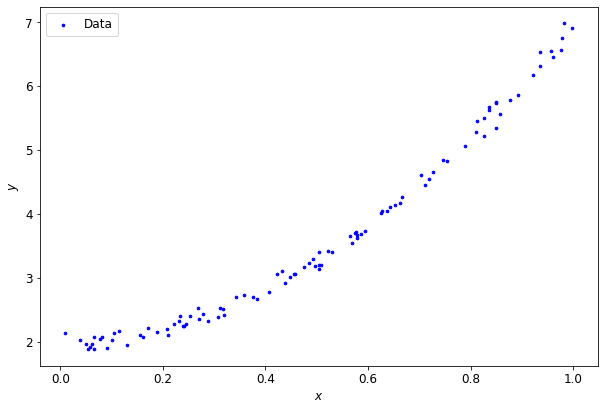

In [2]:
m = 100 
x = np.sort(np.random.rand(m))
y = 2.0 + 5 * x**2 + 0.1 * np.random.randn(m)

# Plot the data to visualize

plt.scatter(x, y, c='blue', s=7, label='Data')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

Our design matrix $\mathrm{X}$ is an $m\times n$-matrix, where $n=3$. It will have the form 

$$\mathrm{X}=\begin{bmatrix}
1 & x_0 & x_0^2 \\
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
\vdots & \vdots & \vdots & \\
1 & x_{m-1} & x_{m-1}^2
\end{bmatrix}$$

In [3]:
# We create an array consisting of ones and fill it with x and x^2
X = np.ones((m, 3))
X[:, 1] = x
X[:, 2] = x**2

To solve the matrix equation $\beta=\big(\mathrm{X^TX}\big)^{-1}\cdot\mathrm{X^Ty}$, we use the `numpy` package.

In [4]:
beta = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta)

[1.96509259 0.21964976 4.7827469 ]


The variable `beta` now contains the coefficients $\beta_0, \beta_1$, and $\beta_2$. The best fit for the data is found by 

$$\mathrm{\tilde{y}}=\mathrm{X\beta}$$

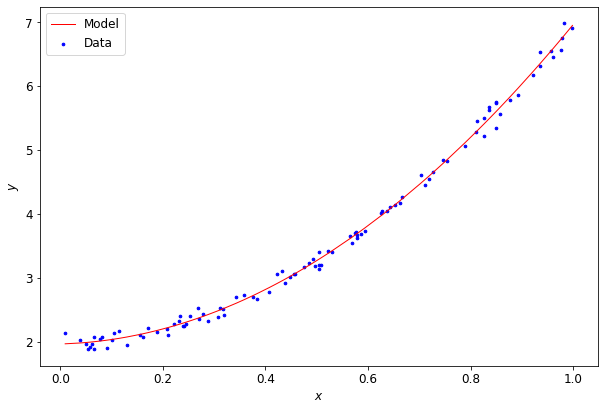

In [5]:
ytilde = X @ beta

# Plot the results
plt.scatter(x, y, c='blue', s=7, label='Data')
plt.plot(x, ytilde, c='red', label='Model')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

To check how well our model fits the data, we check the mean square error (MSE). 

$$\mathrm{MSE}=\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2$$

We define a function to compute the MSE.

In [6]:
def MSE(model, data=y):
    
    n = len(model)
    mse = 1/n * np.sum((model - data)**2)
    
    return mse

mse = MSE(ytilde)
print('MSE:', mse)

MSE: 0.008234487223026467


Now, we will compare our result to the `scikit-learn` solution.

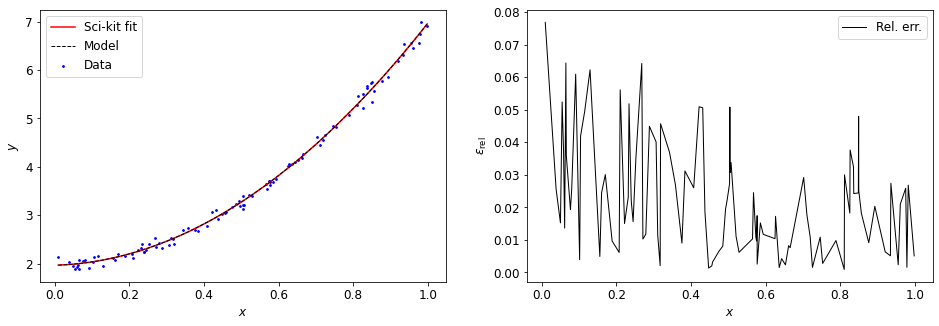

In [7]:
poly2 = PolynomialFeatures(degree=2)
sklearnX = poly2.fit_transform(x[:, np.newaxis])
linereg = LinearRegression()
linereg.fit(sklearnX, y)

ypredict = linereg.predict(sklearnX)

relerr = np.abs(y - ypredict) / np.abs(y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.scatter(x, y, c='blue', s=3, label='Data')
ax1.plot(x, ypredict, c='red', lw=1.5, label='Sci-kit fit')
ax1.plot(x, ytilde, c='black', ls='dashed', label='Model')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.legend()

ax2.plot(x, relerr, c='black', label='Rel. err.')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$\epsilon_\mathrm{rel}$')
ax2.legend()

In the right figure above, it is clear that our model and the model from `scikit-learn` are fairly equal. We now check the MSE of the `scikit-learn` model.

In [8]:
mse_scikit = MSE(ypredict)
print(f"{'MSE scikit-learn:':<18}", mse_scikit)
print(f"{'MSE our model:':<18}", mse)

MSE scikit-learn:  0.008234487223026473
MSE our model:     0.008234487223026467


The $\mathrm{R^2}$ score is computed from the `sckikit-learn` library. Hereafter, we will use the model from this library.

In [9]:
mserror = mean_squared_error(y, ypredict)
r2score = r2_score(y, ypredict)
print(f"{'MSE:':<10}", mserror)
print(f"{'R2 score:':<10}", r2score)

MSE:       0.008234487223026473
R2 score:  0.996242359127905


The MSE tells us that the expected relative squared error of our model is of order $10^{-2}$. The $\mathrm{R^2}$ score suggersts that our model will likely predict future samples well (a score of 1.0 being the best). 

Now, we will change the coefficient in front of the noise-term. Previously, we had

$$y(x)=2+5x^2+0.1\cdot(\mathrm{noise})$$

Now, we will let the coefficient $c\in[0.1,1]$.

In [10]:
c = np.arange(0.1, 1.1, 0.1)
noise = np.random.randn(m)
ytrue = 2. + 5 * x**2
print(f"{'Coeff.':<17}{'MSE':<25}{'R2 score'}")

for i in range(len(c)):
    yi = ytrue + c[i] * noise
    poly2 = PolynomialFeatures(degree=2)
    X = poly2.fit_transform(x[:, np.newaxis])
    reg = LinearRegression()
    reg.fit(X, yi)
    ypredict = reg.predict(X)
    mse = mean_squared_error(yi, ypredict)
    r2 = r2_score(yi, ypredict)
    
    print(f"{c[i]:4.1f}{'':<7}{mse:<25}{r2}")

Coeff.           MSE                      R2 score
 0.1       0.009982379642553421     0.9954132182295515
 0.2       0.03992951857021368      0.981680072730312
 0.3       0.08984141678298074      0.9592204989743135
 0.4       0.1597180742808547       0.9289175464253551
 0.5       0.2495594910638353       0.8920162190895067
 0.6       0.35936566713192286      0.849984834328704
 0.7       0.48913660248511737      0.8043671429370222
 0.8       0.6388722971234186       0.7566508075073066
 0.9       0.8085727510468262       0.7081689887236708
 1.0       0.9982379642553413       0.6600410623785264


It is clear that as the coefficient increases, so does the MSE. Following this, the $\mathrm{R^2}$ score decreases.

### Exercise 3

To split our data in a training set and a testing set, we start by creating some data.

In [87]:
np.random.seed()
n = 100
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

In [25]:
# Creating the design matrix
poly5 = PolynomialFeatures(degree=5)
X = poly5.fit_transform(x)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)
ytilde = clf.predict(X_train)
ypredict = clf.predict(X_test)

mse_train = mean_squared_error(y_train, ytilde)
mse_test = mean_squared_error(y_test, ypredict)

print(f"{'MSE train:':<15}{mse_train}")
print(f"{'MSE test:':<15}{mse_test}")

MSE train:     0.025497779803694408
MSE test:      0.035763561786881656


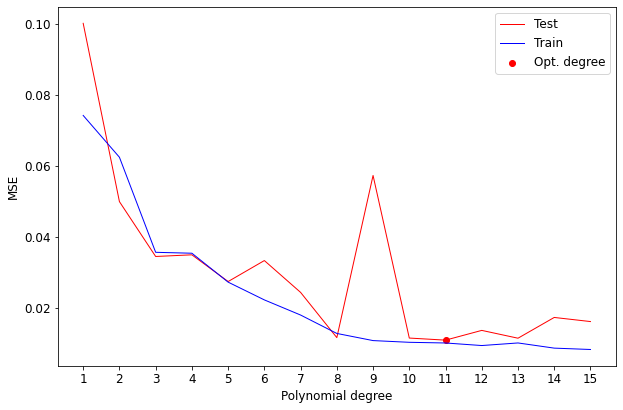

In [85]:
def model(deg):
    poly = PolynomialFeatures(degree=deg)
    X = poly.fit_transform(x)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    ytilde = clf.predict(X_train)
    ypredict = clf.predict(X_test)
    
    mse_train = mean_squared_error(y_train, ytilde)
    mse_test = mean_squared_error(y_test, ypredict)
    
    return np.array([mse_train, mse_test])

poly_deg = np.arange(1, 16)
mse_train = np.zeros(len(poly_deg))
mse_test = np.zeros_like(mse_train)

for i in range(len(poly_deg)):
    mse_train[i], mse_test[i] = model(poly_deg[i])

opt_deg = np.argwhere(mse_test == np.min(mse_test))[0]

plt.plot(poly_deg, mse_test, c='red', label='Test')
plt.plot(poly_deg, mse_train, c='blue', label='Train')
plt.scatter(poly_deg[opt_deg], mse_test[opt_deg], c='red', label='Opt. degree')
plt.xlabel('Polynomial degree')
plt.ylabel('MSE')
plt.xticks(poly_deg)
plt.legend()